# Basic Statistics

The corpus contains the following 12 files, which live in the `corpus` directory at https://github.com/ilonabudapesti/buddhism-nlp/tree/master/Pali_Oxford_MSt/corpus

They are plain text files directly taken from the Digital Pali Reader which uses an electronic version of the CTS Edition.

In [22]:
import nltk, os, re, pprint
from nltk import word_tokenize, sent_tokenize

fileids = os.listdir('../corpus')

The 12 files are combined into one large string. The length of this string is 122,497 characters. 

In [23]:
raw = ''
c = open('corpus.txt','w')
for fileid in fileids:
    f = open('../corpus/' + fileid)
    for line in f:
        raw += line
        c.write(line)
c.close()
len(raw)

122497

In [25]:
sents = sent_tokenize(raw)
len(sents)

1474

In [26]:
sents[500:505]

['atha kho, bho, mahāgovindassa brāhmaṇassa catunnaṃ māsānaṃ accayena ahudeva ukkaṇṭhanā ahu paritassanā — “sutaṃ kho pana metaṃ brāhmaṇānaṃ vuddhānaṃ mahallakānaṃ ācariyapācariyānaṃ bhāsamānānaṃ — ‘yo vassike cattāro māse paṭisallīyati, karuṇaṃ jhānaṃ jhāyati, so brahmānaṃ passati, brahmunā sākaccheti brahmunā sallapati brahmunā mantetī’ti.',
 'na kho panāhaṃ brahmānaṃ passāmi, na brahmunā sākacchemi na brahmunā sallapāmi na brahmunā mantemī’”ti.',
 '♦  brahmunā sākacchā (DN 19)\n\n♦ 318.',
 '“atha V.2.176 kho, bho, brahmā sanaṅkumāro mahāgovindassa brāhmaṇassa cetasā cetoparivitakkamaññāya P.2.240 seyyathāpi nāma balavā puriso samiñjitaṃ vā bāhaṃ pasāreyya, pasāritaṃ vā bāhaṃ samiñjeyya, evameva, brahmaloke antarahito mahāgovindassa brāhmaṇassa sammukhe pāturahosi.',
 'atha kho, bho, mahāgovindassa brāhmaṇassa ahudeva bhayaṃ ahu chambhitattaṃ ahu lomahaṃso yathā taṃ adiṭṭhapubbaṃ rūpaṃ disvā.']

It would be more useful to know the number of words rather than number of characters in the corpus. Therefore we tokenize the raw string, which will split the string up into words taking empty space as the delimiting character. We sample a few element.

Then we use NLTK's built in `Text` method to turn our list of tokens into an NLTK `Text` format. This gives us access to several built-in methods, such as `concordance`, which lists out the occurance of a specific token in the `Text`.

In [4]:
tokens = word_tokenize(raw)
tokens[100:110]

['pasupālakā',
 'kassakā',
 'pathāvino',
 'bhagavantaṃ',
 'yena',
 'coro',
 'aṅgulimālo',
 'tenaddhānamaggapaṭipannaṃ',
 '.',
 'disvāna']

In [5]:
text = nltk.Text(tokens)
text.concordance('samaṇa')

Displaying 9 of 9 matches:
āna bhagavantaṃ etadavocuṃ — “ mā , samaṇa , etaṃ maggaṃ paṭipajji . etasmiṃ ,
, etaṃ maggaṃ paṭipajji . etasmiṃ , samaṇa , magge coro aṅgulimālo nāma luddo 
 aṅgulīnaṃ mālaṃ dhāreti . etañhi , samaṇa , maggaṃ dasapi purisā vīsampi puri
ino bhagavantaṃ etadavocuṃ — “ mā , samaṇa , etaṃ maggaṃ paṭipajji , etasmiṃ s
a , etaṃ maggaṃ paṭipajji , etasmiṃ samaṇa magge coro aṅgulimālo nāma luddo lo
vā aṅgulīnaṃ mālaṃ dhāreti . etañhi samaṇa maggaṃ dasapi purisā vīsampi purisā
āya ajjhabhāsi — ♦ “ gacchaṃ vadesi samaṇa ṭhitomhi , ♦ mamañca brūsi ṭhitamaṭ
si ṭhitamaṭṭhitoti . ♦ pucchāmi taṃ samaṇa etamatthaṃ , ♦ kathaṃ ṭhito tvaṃ ah
oyaṃ paccupādi ( sī . ) , mahāvanaṃ samaṇa paccupādi ( syā . kaṃ . ) } . ♦ soh


We can take a frequency distribution of the text, which will show us how frequently each token (also called *word-type*) occurs.

We list the tokens in order of freqency. Punctuation such as ',' and '.' are most frequent appearing 1557 and 1377 times respectively. This is followed by 'ti', 'kho', 'na' 364, 278 and 203 occurrences each. Words which appear with high frequency but carry no semantic meaning are called *stop-words*. Examples of stop-words in English are 'and', 'the', 'it' and many pronouns.

The first word in the frequency distribution with semantic meaning is 'bhante', which as a form of address falls within the frequency range of stop-words.

Note that words from the Angulimala and Mahagovinda, both from the DN, will appear higher in the frequency distribution due to their texts being longer and therefore there is more chance for repetition.

In [6]:
fd = nltk.FreqDist(text)
fd.most_common()
mc = open('most_common.txt','w')
for token in fd.most_common():
    mc.write(str(token[0] + " " + str(token[1]) + "\n"))
mc.close()

In [7]:
len(text) # number of tokens (words, including punctuation and references) in the corpus

19395

In [8]:
# We remove punctuation and numbers, and count unique tokens.

vocab = sorted(set([w.lower() for w in text if w.isalpha()]))
len(vocab) 

# There are 4,052 unique word-types or tokens in the corpus

4052

A list of all tokens is below, ordered according to the Latin alphabet, with capital letters preceeding small caps.
Note that words with different conjugations and declensions count as different tokens. 
To find out the unique number of head-words we will need to **lemmatize** or **stem** our vocabulary.

In [9]:
vocab

['abbhamiva',
 'abbhantare',
 'abbhañjāpetvā',
 'abbhaññāsi',
 'abbhokāsaṃ',
 'abbhuggacchi',
 'abbhuggantvā',
 'abbhuggato',
 'abbhuggañchi',
 'abbhutaṃ',
 'abbhā',
 'abhabbo',
 'abhikkantavaṇṇo',
 'abhikkantaṃ',
 'abhikkantāya',
 'abhinanditvā',
 'abhinandunti',
 'abhinimanteyyāma',
 'abhinimminitvā',
 'abhinippanno',
 'abhinipphanno',
 'abhipatthitan',
 'abhipatthitaṃ',
 'abhiramatu',
 'abhiramāmī',
 'abhiramāmīti',
 'abhiruyha',
 'abhisambhosi',
 'abhisambhoti',
 'abhisaṅkhāresi',
 'abhisaṅkhāsi',
 'abhisitto',
 'abhisiñceyyuṃ',
 'abhisiñci',
 'abhisiñcissāmī',
 'abhisiñciṃsu',
 'abhivādeti',
 'abhivādetvā',
 'abhivādeyyāma',
 'abhiññā',
 'abhiññāya',
 'abhāsatha',
 'abhāsi',
 'abhāsittha',
 'abhūtaṃ',
 'abyattena',
 'abyattā',
 'abyāpajjena',
 'acarimaṃ',
 'accantaṃ',
 'accayena',
 'acchariyaṃ',
 'acchādetvā',
 'adantānaṃ',
 'adassāvī',
 'adatvā',
 'adayāpanno',
 'adaṇḍena',
 'addasa',
 'addasaṃ',
 'addasā',
 'addasāsuṃ',
 'addhagato',
 'addhamāsassa',
 'addhamāsaṃ',
 'addhamāso',

In [10]:
text.concordance('aggi')

Displaying 1 of 1 matches:
me pubbe , yiṭṭhukāmassa me sato . ♦ aggi pajjalito āsi , kusapattaparitthato 


In [19]:
wc = text.concordance('aggi')
type(wc)

Displaying 1 of 1 matches:
me pubbe , yiṭṭhukāmassa me sato . ♦ aggi pajjalito āsi , kusapattaparitthato 


NoneType

In [20]:
for i in wc:
    print(i)

TypeError: 'NoneType' object is not iterable

# Q: Iterable concordance list would be nice 

In [32]:
def occur(word):
    return [sent for sent in sents if word in sent]

import re
def word_occur(word):
    return [sent for sent in sents if re.search(r"\b"+word+r"\b" ,sent)]

occur('aggi')

['♦ aggi pajjalito āsi, kusapattaparitthato”.',
 'kileso nāmesa halāhalavisūpamo uppāṭitacchavigaṇḍasadiso āsīvisapaṭibhāgo asaniaggisadiso allīyituṃ na yutto āsaṅkitabbo.',
 'evaṃ santepi asītivānarasahassehi adiṭṭhaṃ kipillikapuṭapaṭicchannaṃ ekaṃ pakkaphalaṃ nadiyaṃ patitvā uddhañca adho ca jālaṃ bandhāpetvā udakakīḷaṃ kīḷantassa bārāṇasirañño uddhaṃjāle laggi.',
 'rājā nāvaṃ ṭhapetvā mahājanaparivuto padasā tattha gantvā rukkhamūle sayanaṃ paññapāpetvā ambapakkāni khāditvā nānaggarasabhojanaṃ bhuñjitvā nipajji, sabbadisāsu ārakkhaṃ ṭhapetvā aggiṃ kariṃsu.',
 '♦ so pabhātāya rattiyā mahāsattassa tussitvā “na yuttaṃ imaṃ kapirājānaṃ nāsetuṃ, upāyena naṃ otāretvā paṭijaggissāmī”ti antogaṅgāya nāvāsaṅghāṭaṃ ṭhapetvā tattha aṭṭakaṃ bandhāpetvā saṇikaṃ mahāsattaṃ otārāpetvā piṭṭhiyaṃ kāsāvavatthaṃ pattharāpetvā gaṅgodakena nhāpetvā phāṇitodakaṃ pāyetvā parisuddhasarīraṃ sahassapākatelena abbhañjāpetvā sayanapiṭṭhe eḷakacammaṃ santharāpetvā saṇikaṃ tattha nipajjāpetvā attanā nīce āsane ni

In [33]:
word_occur('aggi')

['♦ aggi pajjalito āsi, kusapattaparitthato”.']

In [28]:
text.concordance('Taṃ') # The concordance method finds occurences regardless of capitalization

Displaying 25 of 85 matches:
ca brūsi ṭhitamaṭṭhitoti . ♦ pucchāmi taṃ samaṇa etamatthaṃ , ♦ kathaṃ ṭhito tv
vā vadhitvā aṅgulīnaṃ mālaṃ dhāreti . taṃ devo paṭisedhetū ” ti . ♦ atha M.2.30
ā itthī tenupasaṅkama ; upasaṅkamitvā taṃ itthiṃ evaṃ vadehi V.2.313 — ‘ yatoha
ā itthī tenupasaṅkama ; upasaṅkamitvā taṃ itthiṃ evaṃ vadehi — ‘ yatohaṃ , bhag
ā itthī tenupasaṅkami ; upasaṅkamitvā taṃ itthiṃ etadavoca — “ yatohaṃ , bhagin
īvo saṅgāme ussahati vāyamati , tassa taṃ cittaṃ pubbe gahitaṃ { hīnaṃ ( sī . p
e , uddesañca vibhaṅgañca desessāmi . taṃ suṇātha , sādhukaṃ manasi karotha ; b
kaṅkhe anāgataṃ . ♦ yadatītaṃ pahīnaṃ taṃ , appattañca anāgataṃ . ♦ “ paccuppan
ṃ ( syā . kaṃ . ka . ) } asaṃkuppaṃ , taṃ vidvā manubrūhaye . ♦ “ ajjeva kiccam
hāriṃ ātāpiṃ , ahorattamatanditaṃ . ♦ taṃ ve bhaddekarattoti , santo ācikkhate 
kaṅkhe anāgataṃ . ♦ yadatītaṃ pahīnaṃ taṃ , appattañca anāgataṃ . ♦ “ paccuppan
 vipassati . ♦ asaṃhīraṃ asaṃkuppaṃ , taṃ vidvā manubrūhaye . ♦ “ ajjeva kiccam
hāriṃ ātāpi

In [34]:
len(occur('taṃ'))

329

In [38]:
len(word_occur('taṃ'))

76

# Q: concordance 85 vs regexp 76 ? (capitalization?)

In [37]:
word_occur('taṃ')

['♦ pucchāmi taṃ samaṇa etamatthaṃ,\n\n♦ kathaṃ ṭhito tvaṃ ahamaṭṭhitomhī”ti.',
 'taṃ devo paṭisedhetū”ti.',
 '♦ “tena hi tvaṃ, aṅgulimāla, yena sā itthī tenupasaṅkama; upasaṅkamitvā taṃ itthiṃ evaṃ vadehi V.2.313 — ‘yatohaṃ, bhagini, jāto {bhagini jātiyā jāto (sī.)}',
 '“tena hi tvaṃ, aṅgulimāla, yena sā itthī tenupasaṅkama; upasaṅkamitvā taṃ itthiṃ evaṃ vadehi — ‘yatohaṃ, bhagini, ariyāya jātiyā jāto, nābhijānāmi sañcicca pāṇaṃ jīvitā voropetā, tena saccena sotthi te hotu, sotthi gabbhassā’”ti.',
 '♦ “evaṃ, bhante”ti kho āyasmā aṅgulimālo bhagavato paṭissutvā yena sā itthī tenupasaṅkami; upasaṅkamitvā taṃ itthiṃ etadavoca — “yatohaṃ, bhagini, ariyāya jātiyā jāto, nābhijānāmi sañcicca pāṇaṃ jīvitā voropetā, tena saccena sotthi te hotu, sotthi gabbhassā”ti.',
 'yo so, gāmaṇi, yodhājīvo saṅgāme ussahati vāyamati, tassa taṃ cittaṃ pubbe gahitaṃ {hīnaṃ (sī.',
 'taṃ suṇātha, sādhukaṃ manasi karotha; bhāsissāmī”ti.',
 '♦ yadatītaṃ pahīnaṃ taṃ, appattañca anāgataṃ.',
 'asaṃkuppaṃ, taṃ vidvā 

# Letter Frequencies

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['font.family'] = 'Arial'

raw[:100]

'Majjhima Nikāya, majjhimapaṇṇāsapāḷi, 4. rājavaggo, 6. aṅgulimālasuttaṃ n (MN 86)\n\n♦ 347. evaṃ M.2.3'

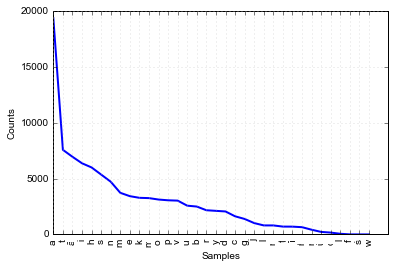

[('a', 19379),
 ('t', 7579),
 ('ā', 6956),
 ('i', 6374),
 ('h', 6001),
 ('s', 5363),
 ('n', 4723),
 ('m', 3728),
 ('e', 3428),
 ('k', 3280),
 ('ṃ', 3254),
 ('o', 3126),
 ('p', 3058),
 ('v', 3029),
 ('u', 2576),
 ('b', 2497),
 ('r', 2167),
 ('y', 2113),
 ('d', 2058),
 ('c', 1624),
 ('g', 1386),
 ('j', 1017),
 ('l', 807),
 ('ṇ', 806),
 ('ṭ', 702),
 ('ī', 698),
 ('ñ', 649),
 ('ṅ', 422),
 ('ū', 225),
 ('ḍ', 165),
 ('ḷ', 58),
 ('f', 4),
 ('ś', 1),
 ('w', 1)]

In [13]:
# alpha only tokens
alphatokens = [t for t in tokens if t.isalpha()]
raw2 = ('').join(alphatokens)
raw3 = [s.lower() for s in raw2]
fd = nltk.FreqDist(raw3)
fd.plot()
fd.most_common(50)

Note there is only one occurance of 'ś', which is strange. The occurance of 'f' and 'w' are from bracketed references pointing to variant readings probably.

### Question: Should we remove content in brackets before processing? () {} []

In [14]:
def make_string(file):
    raw = ''
    with open(file) as f:
        for line in f:
            raw += line
    tokens = word_tokenize(raw)
    alphatokens = [t for t in tokens if t.isalpha()]
    raw2 = ('').join(alphatokens)
    raw3 = [s.lower() for s in raw2]
    return raw3

cfd = nltk.ConditionalFreqDist(
        (fileid, s)
        for fileid in fileids
        for s in make_string('../corpus/' + fileid)
)
cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)

In [15]:
pd1 = cpd[fileids[0]]
pd1.samples()

dict_keys(['s', 'ī', 'v', 'l', 'k', 'm', 'ḷ', 'i', 'n', 'ḍ', 't', 'p', 'r', 'ā', 'c', 'ṇ', 'b', 'a', 'h', 'd', 'ṅ', 'ṭ', 'ū', 'ñ', 'g', 'j', 'o', 'e', 'u', 'y', 'ṃ'])

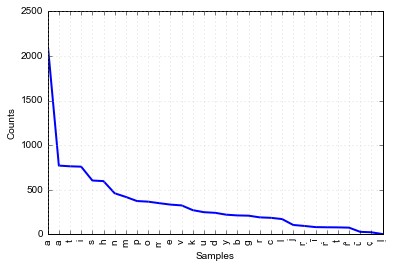

In [16]:
fd1 = nltk.FreqDist((s, pd1.prob(s)) for s in pd1.samples())
fd1 = pd1.freqdist()
fd1.plot()

[('s', 0.05598294559273334), ('ī', 0.007600333673185652), ('v', 0.030123273704699232), ('l', 0.015942163314486977), ('k', 0.025210862915932896), ('m', 0.038928538326072855), ('ḷ', 0.0003707479840578367), ('i', 0.07034942997497451), ('n', 0.04272870516266568), ('ḍ', 0.0022244879043470203), ('t', 0.07072017795903235), ('p', 0.03466493650940773), ('r', 0.017703216238761702), ('ā', 0.07146167392714801), ('c', 0.017239781258689406), ('ṇ', 0.008805264621373621), ('b', 0.019742330151079804), ('a', 0.1977013624988414), ('h', 0.05533413662063213), ('d', 0.022430253035499118), ('ṅ', 0.007414959681156734), ('ṭ', 0.007322272685142275), ('ū', 0.002687922884419316), ('ñ', 0.007044211697098897), ('g', 0.019464269163036427), ('j', 0.009824821577532672), ('o', 0.03401612753730652), ('e', 0.030957456668829365), ('u', 0.023079062007600334), ('y', 0.020483826119195477), ('ṃ', 0.03244044860506071)]


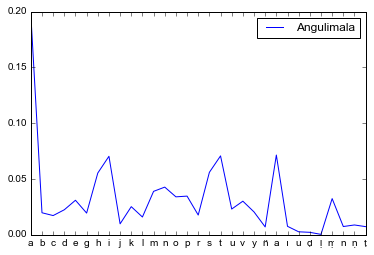

In [17]:
allfds = [cpd[fn].freqdist() for fn in fileids]
unsorted_list = [(x, allfds[0].freq(x)) for x in allfds[0].keys()]
sorted_list = sorted(unsorted_list)
print(unsorted_list)
xlabs, vals = zip(*sorted_list)
nvals = len(xlabs)
plt.plot(range(nvals), vals, label='Angulimala')
plt.xticks(range(nvals), xlabs)
plt.legend()

In [18]:
allxlabs, allvals = [], []
for fd in allfds:
    arr = sorted([(x, fd.freq(x)) for x in fd.keys()])
    xlabs, vals = zip(*arr)
    allxlabs.append(xlabs)
    allvals.append(vals)
assert(allxlabs[0]==allxlabs[1] and allxlabs[1]==allxlabs[2])

AssertionError: 

# Zipf's Law in Pāli

Let `f(w)` be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. `f × r = k`, for some constant `k`). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

Zipf's law hold empirically true for English, the larger the sample size the better the fit, but not for randomly generated texts using the English alphabet.

The question is whether Zipf's law holds true for Pāli.

In [ ]:
text

In [ ]:
fd = nltk.FreqDist(alphatokens)
n = 100
mc = fd.most_common(n)
ranks = list(range(1,n+1))
freqs = [x[1] for x in mc]
freqstimesranks = [(i+1)**0.7*x for i, x in enumerate(freqs)]
plt.plot(ranks, freqstimesranks)

In [ ]:
plt.loglog(ranks, freqs)